In [9]:
import pandas as pd
import seaborn as sns

from sklearn.linear_model import SGDClassifier

In [10]:
df = pd.read_csv("/content/drive/MyDrive/Tyumen_University/data/students.csv")
df_cut = df[["Growth","Weight","Sex"]]
df_cut = df_cut.dropna()
df_cut.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 0 to 185
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Growth  157 non-null    int64  
 1   Weight  157 non-null    float64
 2   Sex     157 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 4.9+ KB


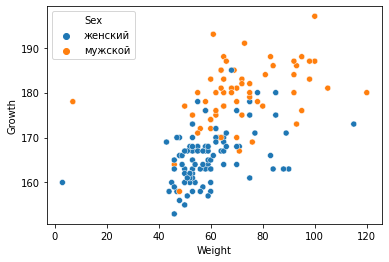

In [11]:
sns.scatterplot(data=df_cut, x= "Weight",y= "Growth", hue = "Sex")

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# scaler.fit(df_cut[["Growth","Weight"]])
df_norm = scaler.fit_transform(df_cut[["Growth","Weight"]])

In [13]:
model = SGDClassifier()
model.fit(df_norm,df_cut["Sex"])

SGDClassifier()

In [14]:
df_test = pd.read_csv("/content/drive/MyDrive/Tyumen_University/data/students_test.csv")
df_test = df_test.dropna()

In [15]:
df_cut_test = df_test[["Growth","Weight","Sex"]]

In [16]:
df_cut_test = df_test[["Growth","Weight","Sex"]]
norm_test = scaler.transform(df_cut_test[["Growth","Weight"]])
df_cut_test["Predict"] = model.predict(norm_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
pd.crosstab(df_cut_test["Predict"],df_cut_test["Sex"])

Sex,женский,мужской
Predict,,
женский,29,3
мужской,7,20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


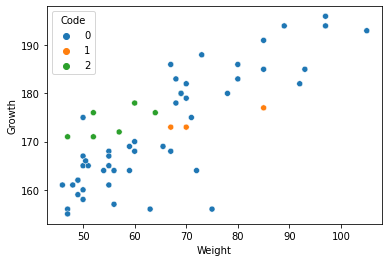

In [20]:
df_cut_test['Code']='0'
df_cut_test.loc[(df_cut_test['Sex']=='мужской') & (df_cut_test['Predict']=='женский'),'Code']='1'
df_cut_test.loc[(df_cut_test['Sex']=='женский') & (df_cut_test['Predict']=='мужской'),'Code']='2'
sns.scatterplot(data=df_cut_test, x='Weight', y='Growth', hue='Code')